## Load meta data
2017-03-15T05:39:50.703

In [1]:
include("load_s1slc_ann.jl");

In [2]:
f = open("ann_path.txt")
path = readlines(f)
meta = load_s1slc_ann(path[1])

Dict{String,Any} with 21 entries:
  "image_number"          => "006"
  "mode"                  => "IW"
  "mission_data_id"       => "33712"
  "burst_meta"            => Dict{String,Any}("first_line_mosaic"=>[1, 1343, 26…
  "samples_per_burst"     => 25330
  "geolocation"           => Dict{String,Any}("line"=>[1, 1, 1, 1, 1, 1, 1, 1, …
  "polarisation"          => "VV"
  "absolute_orbit_number" => "4715"
  "slant_range_time"      => 0.00602248
  "t_start"               => 50.7031
  "azimuth_frequency"     => 486.486
  "t_stop"                => 78.6587
  "pass"                  => "Descending"
  "mission_id"            => "S1B"
  "product_type"          => "SLC"
  "incidence_angle_mid"   => 43.5933
  "burst_count"           => 10
  "range_pixel_spacing"   => 2.32956
  "lines_per_burst"       => 1524
  "t_0"                   => 2017-03-15T05:39:00
  "swath"                 => 3

In [3]:
t_0 = meta["t_0"]
t_start = meta["t_start"]
t_stop = meta["t_stop"]

78.658671

## LOADING

#### function load_pod() 

In [4]:
include("load_pod.jl");

In [5]:
f = open("POD_path.txt")
path = readlines(f)
osv,t_sv = load_pod(path[1],t_0);

## FUNCTIONS

#### function ellipsoid2xyz()

In [6]:
include("ellipsoid2xyz.jl");

In [7]:
# input
a = 10; flat = 2; h = [.2, .1, .6];
lat = [pi/4, 3*pi, pi/6]; lon = [pi/2, pi/4, pi/8];

In [8]:
x,y,z = ellipsoid2xyz(lat, lon, h)

([2.76623e-10, -4.51002e6, 5.10744e6], [4.51759e6, -4.51002e6, 2.11557e6], [4.48735e6, 2.3276e-9, 3.17037e6])

#### function calc_sat_trajectory() 

In [9]:
include("calc_sat_trajectory.jl");

In [10]:
osv_poly,osv_mean, osv_std = polyfit_sv(osv, t_sv);

In [11]:
y_fit = polyval_sv(osv_poly,3.4)

6-element Array{Float64,1}:
 -1.5782623802394961e-6
 -1.3338340672931295e-5
 -5.9049774361397216e-6
 -5.3949723834290056e-6
 -7.3440607454550125e-6
  1.0067055160589042e-5

In [12]:
y_fit .*osv_std .+osv_mean

6-element Array{Float64,1}:
 -21912.547276708116   
  28532.852392815585   
 -89571.43225461023    
     -7.042669487481774
    -75.68013330086274 
    -32.09150270896861 

In [13]:
y_fit = polyval_sv(osv_poly,3.4,osv_mean, osv_std)

6-element Array{Float64,1}:
 -21912.547276708116   
  28532.852392815585   
 -89571.43225461023    
     -7.042669487481774
    -75.68013330086274 
    -32.09150270896861 

In [14]:
osv_poly, osv_mean, osv_std = calc_sat_trajectory(osv,t_sv, t_start, t_stop);

## function polyval_sv() 

Recunstruct one time

In [15]:
y_fit = polyval_sv(osv_poly,3.4,osv_mean, osv_std)

6-element Array{Float64,1}:
     3.5310566513978513e6
     1.1918181467537319e6
     6.005118964793226e6 
  6560.077268827518      
  -212.66825434708963    
 -3806.2761008601037     

#### function zero_doppler_bisect()

In [16]:
include("zero_doppler_bisect.jl")
include("ellipsoid2xyz.jl");
include("calc_sat_trajectory.jl");
include("load_pod.jl");
import Dates

In [17]:
f = open("POD_path.txt")
path = readlines(f)
osv, t_sv = load_pod(path[1], t_0);

In [18]:
lat_1 = (56 + 33/60 + 44.4528/(60*60)) * pi/180
lon_1 = (8 + 18/60 + 24.865/(60*60)) * pi/180
height_1 = 43.282;

In [19]:
point_xyz_1 = ellipsoid2xyz(lat_1, lon_1, height_1)

(3.485824828590261e6, 508956.0100922042, 5.299237309602344e6)

In [20]:
osv_poly, osv_mean, osv_std = calc_sat_trajectory(osv, t_sv, t_start, t_stop);

In [21]:
time_1, range_1,osv_1, los, iter_1 = zero_doppler_bisect(point_xyz_1, t_start, t_stop,
                                    osv_poly, osv_mean, osv_std, 1)

5-element Array{Any,1}:
     53.00873236668478                                              
 916952.0203446317                                                  
       [3.85143e6, 1.17847e6, 5.80805e6, 6353.0, -325.269, -4136.96]
       [-3.65607e5, -6.6951e5, -5.08811e5]                          
     27                                                             

In [22]:
iter_1

27

In [23]:
osv_1

6-element Array{Float64,1}:
     3.851431720948488e6 
     1.1784662994998633e6
     5.808048257058798e6 
  6352.997551025259      
  -325.26905605800476    
 -4136.956394945697      

### Calculate line and sample of corner refelctors

In [24]:
c = 299792458 # speed of light
# info from ann
#prf =486.4863102995529
#r_near = 6.022480032448950e-03*c/2
#fs = 6.434523812571428e7
#range_pixel_spacing = c/(2*fs);
#t_start_burst_1 = t_start;

range_pixel_spacing = meta["range_pixel_spacing"]
azimuth_frequency = meta["azimuth_frequency"] 
r_near = meta["slant_range_time"]  *c/2


902747.0460918952

In [25]:
osv_poly, osv_mean, osv_std = calc_sat_trajectory(osv, t_sv, t_start, t_stop);

In [26]:
#reflector 1
lat_1 = (56 + 33/60 + 42.5556/(60*60)) * pi/180
lon_1 = (8 + 18/60 + 26.874/(60*60)) * pi/180
height_1 = 42.753;
point_xyz_1 = ellipsoid2xyz(lat_1, lon_1, height_1)
time_1,range_1 = zero_doppler_bisect(point_xyz_1, t_start, t_stop,
                                      osv_poly, osv_mean, osv_std)
line_1 = 1+(time_1 - t_start)*azimuth_frequency
sample_1 = 1 + (range_1-r_near)/range_pixel_spacing
print("(line, sample): ", line_1, ", ",sample_1)

(line, sample): 1126.4298040945805, 6086.267954269774

In [27]:
# reflector 2
lat_2 = (56 + 33/60 + 44.4528/(60*60)) * pi/180
lon_2 = (8 + 18/60 + 24.865/(60*60)) * pi/180
height_2 = 43.282;
point_xyz_2 = ellipsoid2xyz(lat_2, lon_2, height_2)
time_2,range_2  = zero_doppler_bisect(point_xyz_2, t_start, t_stop,
                                    osv_poly, osv_mean, osv_std)
line_2 = 1 + (time_2 - t_start)*azimuth_frequency
sample_2 = 1 + (range_2-r_near)/range_pixel_spacing
print("(line, sample): ", line_2, ", ",sample_2)

(line, sample): 1122.6561505441537, 6098.701736522378

In [28]:
#reflector 3
lat_3 = (56 + 33/60 + 42.8652/(60*60)) * pi/180
lon_3 = (8 + 18/60 + 22.104/(60*60)) * pi/180
height_3 = 44.475;
point_xyz_3 = ellipsoid2xyz(lat_3, lon_3, height_3)
time_3,range_3 = zero_doppler_bisect(point_xyz_3, t_start, t_stop,
                                      osv_poly, osv_mean, osv_std)
line_3 = 1 + (time_3 - t_start) * azimuth_frequency
sample_3 = 1 + (range_3 - r_near) / range_pixel_spacing
print("(line, sample): ", line_3, ", ",sample_3)

(line, sample): 1126.7088611236884, 6109.432027197682

#### Bridge coordinates test
Bridge in "Ringkøbing Fjord" with coords: (lat,lon)=(56.003092, 8.129702), corresponding to the 5th burst in IW3, with indices of center of bridge: (row, col)=(6414, 6258) 

In [35]:
#Ringkøbing fjord bridge
lat_bridge = (56.003092) * pi/180
lon_bridge = (8.129702) * pi/180
height_bridge = (42.753 + 43.282 + 44.475)/3; #iflg DHM imellem 5 og 2.5 meter oh.
point_xyz_bridge = ellipsoid2xyz(lat_bridge, lon_bridge, height_bridge)
time_bridge, range_bridge = zero_doppler_bisect(point_xyz_bridge, t_start, t_stop,
                                      osv_poly, osv_mean, osv_std)
line_bridge = 1 + (time_bridge - t_start) * azimuth_frequency
sample_bridge = 1 + (range_bridge - r_near) / range_pixel_spacing
print("(line, sample): ", line_bridge, ", ",sample_bridge)

(line, sample): 5685.960841641715, 6255.924240537156

### Reproject DEM

In [ ]:
include("reproject_dem.jl")
# read dem path
f = open("dem_path.txt")
input_dem_path = readlines(f)[1]

# put output dem in same folder as input:
tmp = split(input_dem_path, ".")
output_dem_path = tmp[1] * "_reprojected." * tmp[2]

# choose projection from/to in epsg
from_projection = "4326+5773"
to_projection = "4979"

reproject_dem(input_dem_path, output_dem_path, from_projection="4326+5773", to_projection="4979")

## Create DEM grid and Interpolate to sample lines

In [1]:
using Plots
using PyCall
using Images
using Statistics
rasterio = pyimport("rasterio");
scipy_interp = pyimport("scipy.interpolate");
include("load_pod.jl")
include("load_dem_subset.jl");
include("grid_dem.jl");
include("dem_interp.jl");
include("llh2sali.jl")
include("/Users/eyu/Google Drive/DTU/9_semester/synthesis/code/syntese/structs/SlcRaw.jl");
include("/Users/eyu/Google Drive/DTU/9_semester/synthesis/code/syntese/coords2index/load_s1slc_ann.jl");

proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


In [2]:
f = open("data_path.txt")
data_path = readlines(f)[1]

file = open("ann_path.txt")
ann_path = readlines(file)[1]
sar_parameters = load_s1slc_ann(ann_path)

file = open("POD_path.txt")
path = readlines(file)
osv, t_sv = load_pod(path[1], sar_parameters["t_0"]);

file = open("dem_path.txt")
dem_path = readlines(file)[1];
dem_annotations = rasterio.open(dem_path);

proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


In [4]:
slc_view = [1000:1300, 5900:6400]
slc_image = SlcRaw(slc_view, load_s1slc_ann(ann_path), load_s1slc_data(data_path, slc_view));

proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


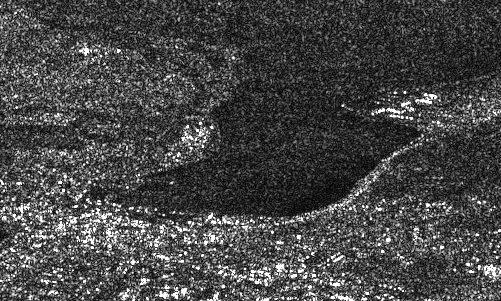

In [5]:
show_img(slc_image)

In [6]:
lat_corners_slc, lon_corners_slc = footprint(slc_image.meta, slc_view)

([56.591, 56.5586, 56.5611, 56.5935], [8.32743, 8.31752, 8.28973, 8.29958])

#### Load DEM

In [7]:
# could be from footprint instead
# lat_corners_slc = [56.53182099999999, 56.581821]
# lon_corners_slc = [8.247465, 8.367465000000001]
lat_corners_slc = [minimum(lat_corners_slc), maximum(lat_corners_slc)]
lon_corners_slc = [minimum(lon_corners_slc), maximum(lon_corners_slc)]


# load only the relevant DEM, 
# !!! til padding kan den her evt returnere min max af lat lon efter padding !!!
# lav padding til antal pixels
# skal også outputte dem_view [row_interval, col_interval]
dem_cropped, dem_view = load_dem_subset(dem_annotations, lat_corners_slc, lon_corners_slc;
                              approx_ellipsoid_value=39, 
                              nan_fill=-4,
                              lat_padding=50, lon_padding=50);

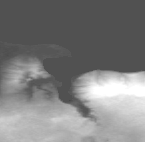

In [8]:
show_img(dem_cropped)

#### Grid DEM

In [9]:
# skal tage dem_view som input, output kun lat lon
dem_lat_lon = grid_dem(dem_cropped, dem_annotations, dem_view);

In [10]:
llh = hcat(dem_lat_lon, reshape(dem_cropped, :));

In [11]:
# del (lat lon) og height op i input. Lav en hcat inden som intermediate step
dem_sample_line = llh2sali(llh, osv, t_sv, sar_parameters);

In [12]:
z = reshape(dem_cropped, :);

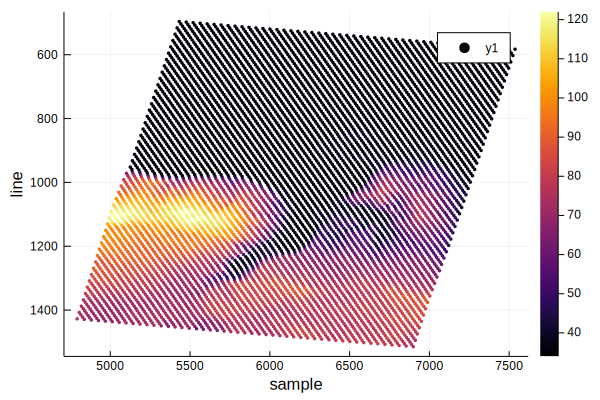

In [13]:
steps= 3
scatter(dem_sample_line[1:steps:end,2],dem_sample_line[1:steps:end,1],
    zcolor=z[1:steps:end],
    yaxis = ("line", :flip),xaxis = ("sample"),
    markersize=2, markerstrokewidth = 0)

In [14]:
slc_view

2-element Array{UnitRange{Int64},1}:
 1000:1300
 5900:6400

### Interpolate DEM

In [15]:
# view within this sample line limits:
# brug view fra slc img skulle gerne passe med lat_max/min og lon_max/min fra footprint
#view = [5300:7000, 1000:1220]
view = slc_view # slc_view[1] er rows dvs y og [2] er cols

# interpolate
z_grid = dem_interp(dem_sample_line[1:steps:end,2], 
                    dem_sample_line[1:steps:end,1], 
                    z[1:steps:end], 
                    slc_view[2], 
                    slc_view[1]; x_step=1, y_step=1);

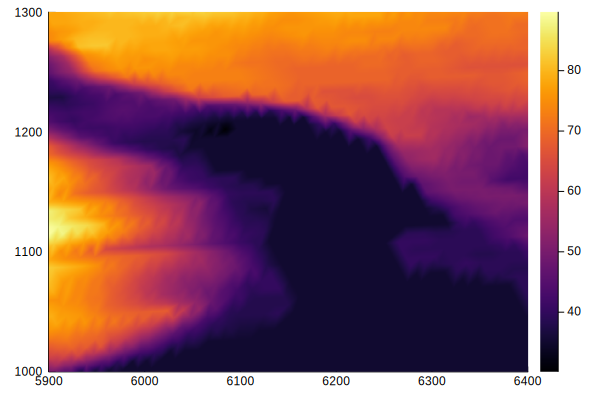

In [16]:
# this [end:-1:1, :] selection flips the image so it is the right way around [end:-1:1, :]
heatmap(slc_view[2],slc_view[1],z_grid)

In [ ]:
slc_view